In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML projects/Bank_Personal_Loan_Modelling.csv')
df.head() #first 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
'''  ATTRIBUTE INFORMATION
ID         : Customer ID
Age       : Customer's age in completed years
Experience: #years of professional experience
Income : Annual income of the customer ($000)
ZIP Code: Home Address ZIP code
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month ($000)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. ($000)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
Credit card: Does the customer use a credit card issued by UniversalBank?'''

"  ATTRIBUTE INFORMATION\nID         : Customer ID\nAge       : Customer's age in completed years\nExperience: #years of professional experience\nIncome : Annual income of the customer ($000)\nZIP Code: Home Address ZIP code\nFamily: Family size of the customer\nCCAvg: Avg. spending on credit cards per month ($000)\nEducation: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional\nMortgage: Value of house mortgage if any. ($000)\nPersonal Loan: Did this customer accept the personal loan offered in the last campaign?\nSecurities Account: Does the customer have a securities account with the bank?\nCD Account: Does the customer have a certificate of deposit (CD) account with the bank?\nOnline: Does the customer use internet banking facilities?\nCredit card: Does the customer use a credit card issued by UniversalBank?"

In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.isnull().sum() #checking for null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique())) #checking for unique values

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Total attributes 14 out of which ID and ZIP code are not relevant .

*   Continuous variable [5] : Age, Experience, Income, CCAvg, Mortgage
*   Categorical variable [7] : Family, Education, Personal Loan, Securities account, CD Account, Online, Credit card
*    Target variable : Personal Loan (Did this customer accept the personal loan offered in the last campaign?)



In [9]:
df.describe() #5 point summary

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


there are some records with negative experience. we need to clean them.

In [10]:
(df.Experience < 0).value_counts() 

False    4948
True       52
Name: Experience, dtype: int64

In [11]:
df[df.Experience >= 0].Experience.median()


20.0

In [12]:
#replacing the negative values with their medians
df.loc[df.Experience < 0,'Experience']=21.0

In [13]:
df[df.Experience <0]['Experience'].count()

0

In [14]:
df=df.drop(columns=['ID','ZIP Code'])

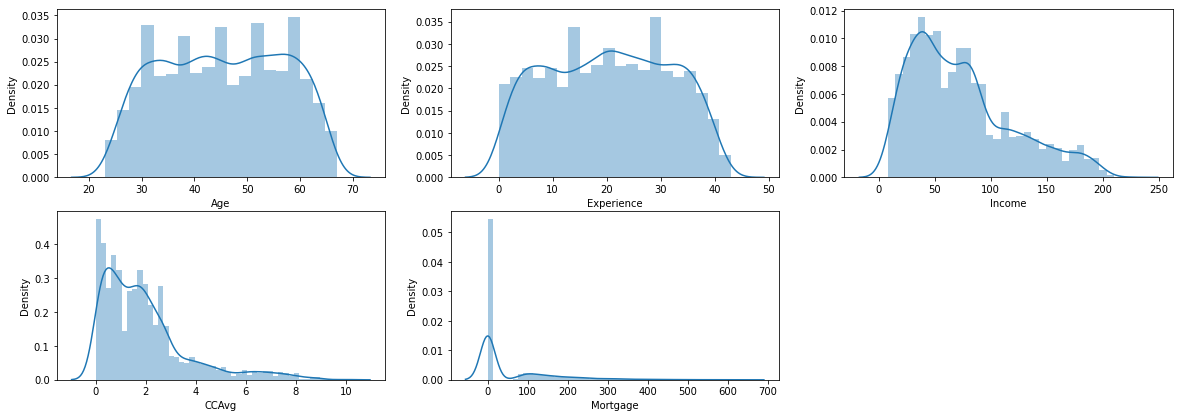

In [15]:
# distributions for continuous variables : Age, Experience, Income, CCAvg, Mortgage
plt.figure(figsize= (20,18))
plt.subplot(5,3,1)
sns.distplot(df.Age,kde=True)

plt.subplot(5,3,2)
sns.distplot(df.Experience,kde=True)

plt.subplot(5,3,3)
sns.distplot(df.Income,kde=True)

plt.subplot(5,3,4)
sns.distplot(df.CCAvg,kde=True)

plt.subplot(5,3,5)
sns.distplot(df.Mortgage,kde=True)

plt.show()

* Age and Experience are - uniformally distributed
* Income and CCAvge and Mortgage are skewed

In [16]:
skew=pd.DataFrame({'skewness_values':[df.Age.skew(), df.Experience.skew(), df.Income.skew(), df.CCAvg.skew(), df.Mortgage.skew()]},index=('Age','Experience','Income','CCAvg','Mortgage'))
skew

,skewness_values
Age,-0.029341
Experience,-0.016870
Income,0.841339
CCAvg,1.598443
Mortgage,2.104002


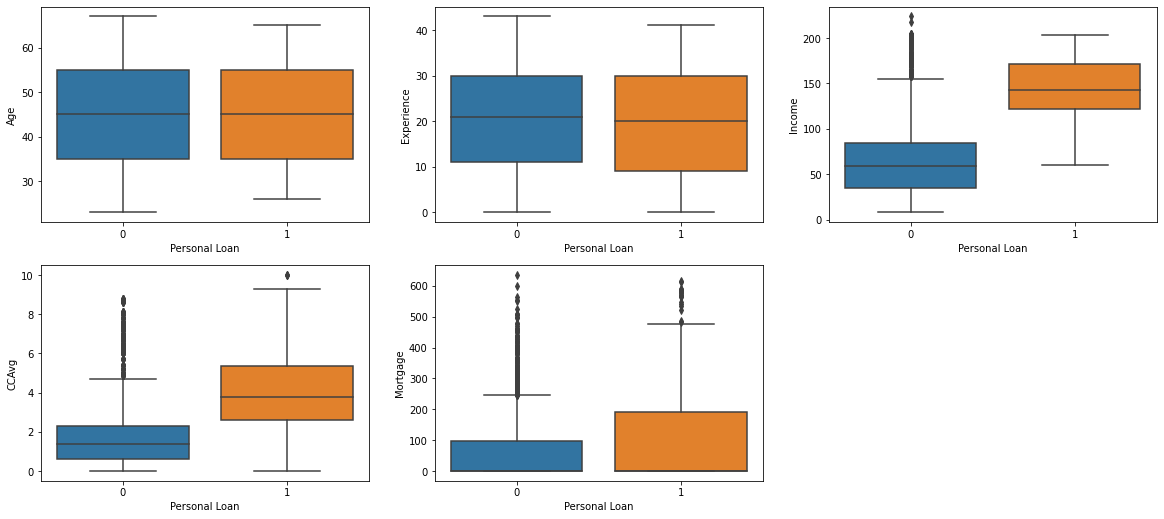

In [17]:
#checking the presence of outliers
plt.figure(figsize= (20,23))
plt.subplot(5,3,1)
sns.boxplot(x=df['Personal Loan'],y=df.Age)

plt.subplot(5,3,2)
sns.boxplot(x=df['Personal Loan'],y=df.Experience)

plt.subplot(5,3,3)
sns.boxplot(x=df['Personal Loan'],y=df.Income)

plt.subplot(5,3,4)
sns.boxplot(x=df['Personal Loan'],y=df.CCAvg)

plt.subplot(5,3,5)
sns.boxplot(x=df['Personal Loan'],y=df.Mortgage)

plt.show()

* Age and Experience - no outliers
* Income - less outliers
* CCAvg and Mortgage - many outliers

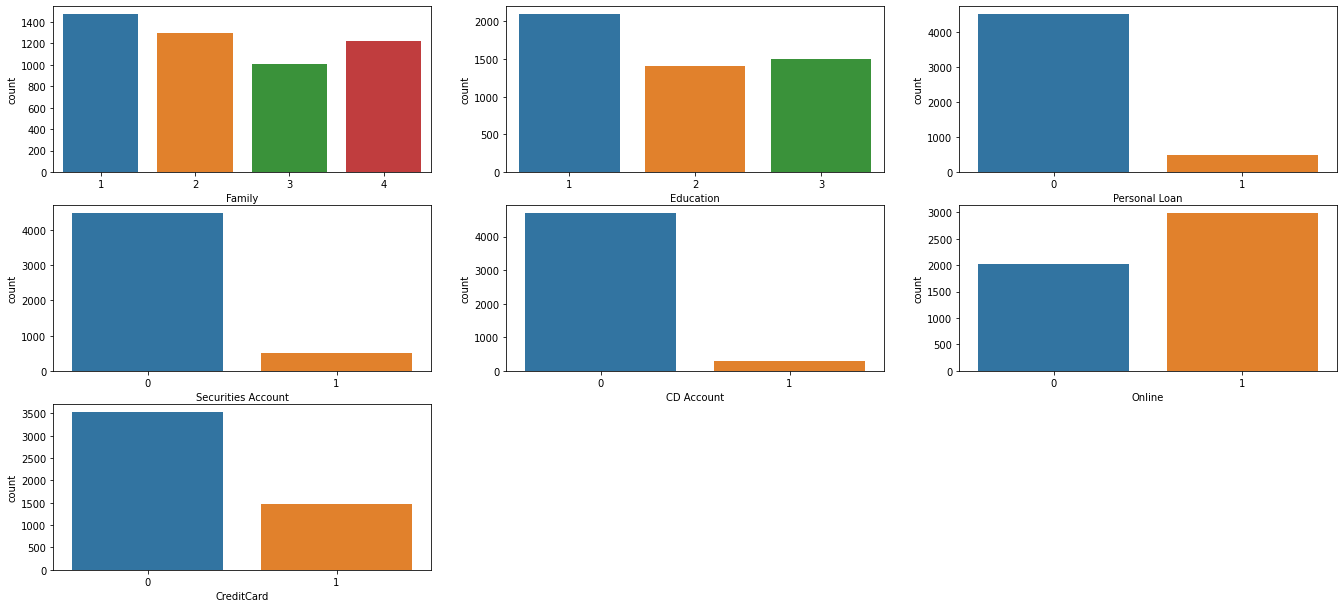

In [18]:
# distribution of categorical columns : Family, Education, Personal Loan, Securities account, CD Account, Online, Credit card
plt.figure(figsize= (23,25))
plt.subplot(7,3,1)
sns.countplot(df.Family)

plt.subplot(7,3,2)
sns.countplot(df.Education)

plt.subplot(7,3,3)
sns.countplot(df['Personal Loan'])

plt.subplot(7,3,4)
sns.countplot(df['Securities Account'])

plt.subplot(7,3,5)
sns.countplot(df['CD Account'])

plt.subplot(7,3,6)
sns.countplot(df.Online)

plt.subplot(7,3,7)
sns.countplot(df.CreditCard)

plt.show()

Many people who have not taken personal loan also have no Securities account, CD Account and Credit card

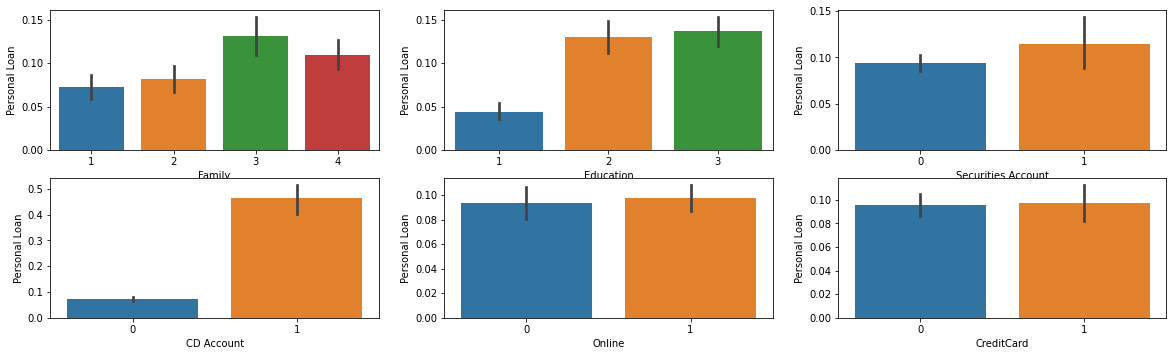

In [19]:
# barplot - categorical data and target column
plt.figure(figsize= (20,18))
plt.subplot(6,3,1)
sns.barplot(df.Family,df['Personal Loan'])

plt.subplot(6,3,2)
sns.barplot(df.Education,df['Personal Loan'])


plt.subplot(6,3,3)
sns.barplot(df['Securities Account'],df['Personal Loan'])


plt.subplot(6,3,4)
sns.barplot(df['CD Account'],df['Personal Loan'])

plt.subplot(6,3,5)
sns.barplot(df.Online,df['Personal Loan'])

plt.subplot(6,3,6)
sns.barplot(df.CreditCard,df['Personal Loan'])

plt.show()

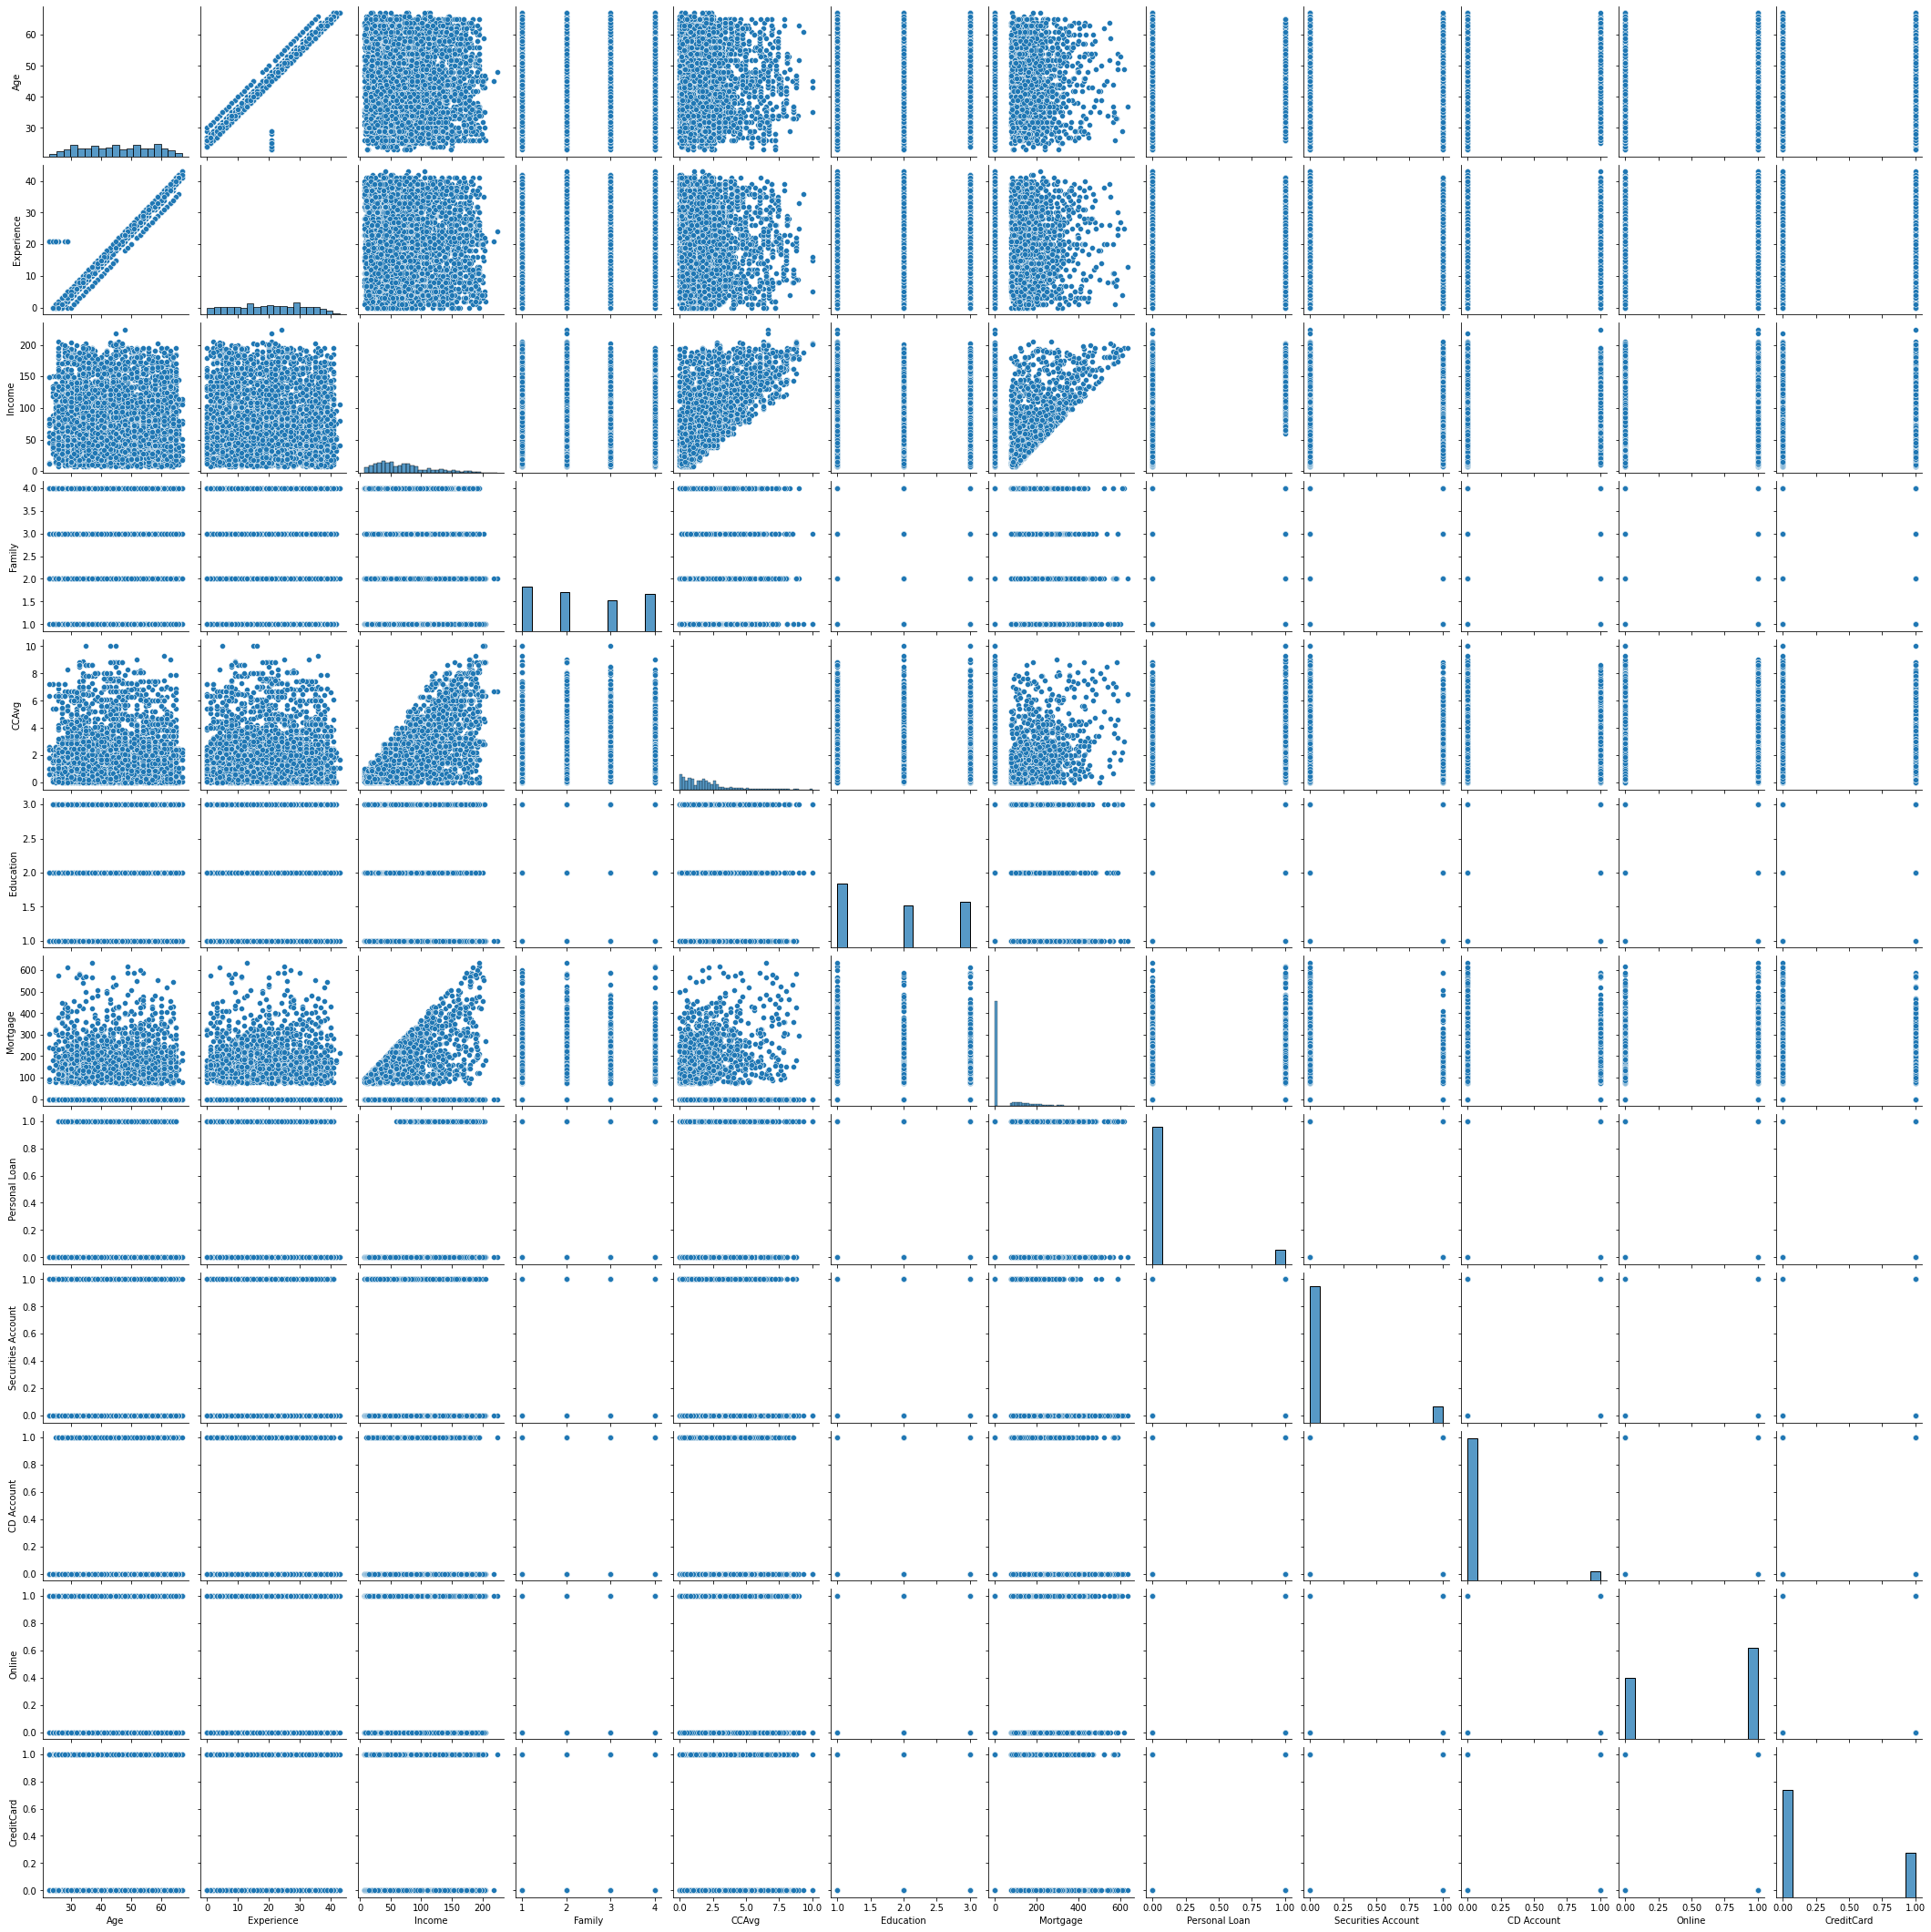

In [20]:
sns.pairplot(df)

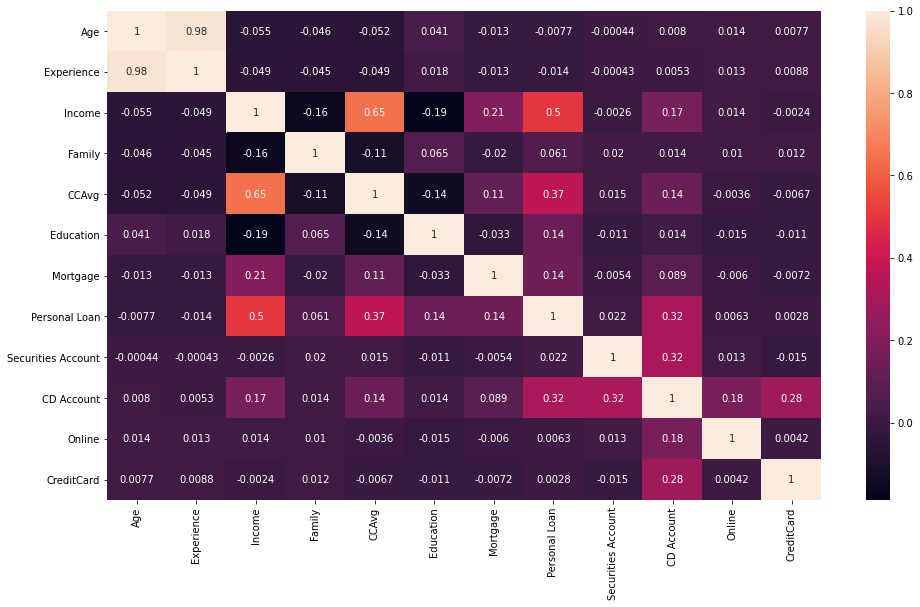

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

Correlated aatributes:

*   age - experience
*   income- CCAvg,Personal Loan
*   CD Account- personal loan, Securities Account



In [22]:
#Outliers treatment of Mortgage by usinf Zscore
from scipy.stats import zscore
df['mzscore']=np.abs(zscore(df.Mortgage))
df=df[df.mzscore < 3]
df.drop('mzscore', axis=1 , inplace= True)

In [23]:
df.shape

(4895, 12)

In [24]:
x=df.drop('Personal Loan', axis=1)
y=df['Personal Loan']


Splitting training and testing set

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

**1) Logistic Regression model**

In [26]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(solver="liblinear")
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

In [27]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.83      0.55      0.66       128

    accuracy                           0.95      1469
   macro avg       0.89      0.77      0.82      1469
weighted avg       0.95      0.95      0.95      1469

Confusion matrix :
 [[1326   15]
 [  57   71]]
Accuracy score : 0.9509870660313138


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
#Scaling the attributes
lgr_pipe=Pipeline([("scaler",StandardScaler()),("lgr",LogisticRegression(solver="liblinear"))]) 
lgr_pipe.fit(x_train,y_train)
y_pred=lgr_pipe.predict(x_test)

In [30]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469

Confusion matrix :
 [[1324   17]
 [  52   76]]
Accuracy score : 0.9530292716133424


In [31]:
# calculating area under the curve
from sklearn.metrics import roc_curve,auc
lgr_prob= lgr.predict_proba(x_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,lgr_prob[:,1])
area1=auc(fpr1,tpr1)
print("area under the curve: %f"% area1)

area under the curve: 0.949816


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid={'solver' : ('newton_cg','liblinear'),'penalty' : ('l1','l2'), 'C' : (100,10,1,0.1,0.01)}
gs=GridSearchCV(lgr,param_grid,cv=10)
gs.fit(x_train,y_train)
print("best parameter for Logistic is ",gs.best_params_)
print("best accuracy for Logistic is ",gs.best_score_)

best parameter for Logistic is  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
best accuracy for Logistic is  0.9524244284179838


**2) Gaussian Naive Base Model**

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.58      0.49       128

    accuracy                           0.89      1469
   macro avg       0.69      0.75      0.71      1469
weighted avg       0.91      0.89      0.90      1469

Confusion matrix :
 [[1238  103]
 [  54   74]]
Accuracy score : 0.8931245745405038


In [35]:
#Scaling the attributes
gnb_pipe=Pipeline([("scaler",StandardScaler()),("gnb",GaussianNB())])
gnb_pipe.fit(x_train,y_train)
y_pred=gnb_pipe.predict(x_test)

In [36]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.58      0.49       128

    accuracy                           0.89      1469
   macro avg       0.69      0.75      0.71      1469
weighted avg       0.91      0.89      0.90      1469

Confusion matrix :
 [[1238  103]
 [  54   74]]
Accuracy score : 0.8931245745405038


In [37]:
# calculating area under the curve
gnb_prob=gnb.predict_proba(x_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,gnb_prob[:,1])
area2=auc(fpr2,tpr2)
print("area under the curve: %f"% area2)

area under the curve: 0.923961


In [38]:
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}
gs=GridSearchCV(gnb,param_grid,cv=10)
gs.fit(x_train,y_train)
print("best parameter for GaussianNB is ",gs.best_params_)
print("best accuracy for GaussianNB is ",gs.best_score_)

best parameter for GaussianNB is  {'var_smoothing': 1e-05}
best accuracy for GaussianNB is  0.915645406032087


**3) KNN model**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1341
           1       0.46      0.32      0.38       128

    accuracy                           0.91      1469
   macro avg       0.70      0.64      0.66      1469
weighted avg       0.89      0.91      0.90      1469

Confusion matrix :
 [[1292   49]
 [  87   41]]
Accuracy score : 0.9074200136147039


In [40]:
#Scaling the attributes
knn_pipe=Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier())])
knn_pipe.fit(x_train,y_train)
y_pred=knn_pipe.predict(x_test)

In [41]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1341
           1       0.96      0.62      0.75       128

    accuracy                           0.96      1469
   macro avg       0.96      0.81      0.87      1469
weighted avg       0.96      0.96      0.96      1469

Confusion matrix :
 [[1338    3]
 [  49   79]]
Accuracy score : 0.9646017699115044


In [42]:
# calculating area under the curve
knn_prob=knn_pipe.predict_proba(x_test)
fpr3,tpr3,thresholds3=roc_curve(y_test,knn_prob[:,1])
area3=auc(fpr3,tpr3)
print("area under the curve: %f"% area3)

area under the curve: 0.937410


In [43]:
param_grid={'n_neighbors' : range(1,21,2), 'weights' : ('uniform','distance'),'metric' : ('euclidean','manhattan','minkowski')}
gs=GridSearchCV(knn,param_grid,cv=10)
gs.fit(x_train,y_train)
print("best parameter for KNN is ",gs.best_params_)
print("best accuracy for KNN is ",gs.best_score_)

best parameter for KNN is  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
best accuracy for KNN is  0.9299549895146029


**4) SVM Model**

In [44]:
from sklearn.svm import SVC
svm=SVC(gamma=0.025,C=3)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1341
           1       0.69      0.36      0.47       128

    accuracy                           0.93      1469
   macro avg       0.81      0.67      0.72      1469
weighted avg       0.92      0.93      0.92      1469

Confusion matrix :
 [[1320   21]
 [  82   46]]
Accuracy score : 0.9298842750170184


In [45]:
#Scaling the attributes
svm_pipe=Pipeline([("scaler",StandardScaler()),("svm",SVC(gamma=0.025,C=3,kernel='linear',probability=True))])
svm_pipe.fit(x_train,y_train)
y_pred=svm_pipe.predict(x_test)

In [46]:
print("Classification report :\n",metrics.classification_report(y_test,y_pred))
print("Confusion matrix :\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1341
           1       0.88      0.58      0.70       128

    accuracy                           0.96      1469
   macro avg       0.92      0.79      0.84      1469
weighted avg       0.95      0.96      0.95      1469

Confusion matrix :
 [[1331   10]
 [  54   74]]
Accuracy score : 0.95643294758339


In [47]:
# calculating area under the curve
svm_prob=svm_pipe.predict_proba(x_test)
fpr4,tpr4,thresholds4=roc_curve(y_test,svm_prob[:,1])
area4=auc(fpr4,tpr4)
print("area under the curve: %f"% area4)

area under the curve: 0.946655


In [48]:
'''param_grid={'kernel': ('poly','rbf','sigmoid'),'C' : (50,10,1.0,0.1,0.01)}
gs=GridSearchCV(svm,param_grid,cv=10)
gs.fit(x_train,y_train)
print("best parameter for SVM is ",gs.best_params_)
print("best accuracy for SVM is ",gs.best_score_)'''

'param_grid={\'kernel\': (\'poly\',\'rbf\',\'sigmoid\'),\'C\' : (50,10,1.0,0.1,0.01)}\ngs=GridSearchCV(svm,param_grid,cv=10)\ngs.fit(x_train,y_train)\nprint("best parameter for SVM is ",gs.best_params_)\nprint("best accuracy for SVM is ",gs.best_score_)'

**Plotting ROC curve for each model**

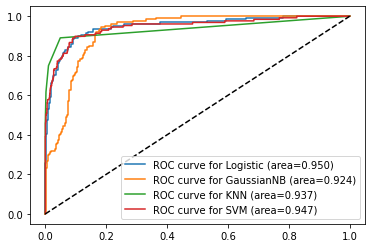

In [49]:
import pylab as pl
pl.clf()
pl.plot(fpr1,tpr1,label='ROC curve for Logistic (area=%0.3f)' % area1)
pl.plot(fpr2,tpr2,label='ROC curve for GaussianNB (area=%0.3f)' % area2)
pl.plot(fpr3,tpr3,label='ROC curve for KNN (area=%0.3f)' % area3)
pl.plot(fpr4,tpr4,label='ROC curve for SVM (area=%0.3f)' % area4)
pl.plot([0,1],[0,1],'k--')
pl.legend(loc="lower right")
pl.show()

**Accuracy order: Logistic > SVM > KNN > Gaussian**